# toxic comments classification
## by Karin Brisker





imports

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import re
import os
import time

import sklearn

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier

import itertools
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import PorterStemmer

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")
sns.set_palette("pastel")

/home/nlp/dahanka1/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
# load data
train_df = pd.read_csv('./Data/train.csv')
test_df = pd.read_csv('./Data/test.csv')
print('Train shape: ', train_df.shape)
print('Test shape: ', test_df.shape) 

Train shape:  (159571, 8)
Test shape:  (153164, 2)


In [4]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### visualization - count of each label 

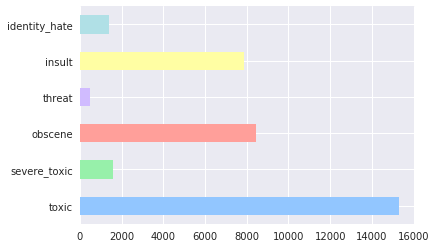

In [5]:
labels = list(train_df.columns[2:])

# y values
labels_data_train = train_df.iloc[:,2:]
labels_data_test = test_df.iloc[:,2:]

labels_count = labels_data_train.sum(axis = 0)
labels_count.plot(kind='barh')

### count of each label - sorted

In [6]:
pd.DataFrame(labels_count.sort_values(ascending=False), columns=['count'])

,count
toxic,15294
obscene,8449
insult,7877
severe_toxic,1595
identity_hate,1405
threat,478


### heatmap - correlation between labels

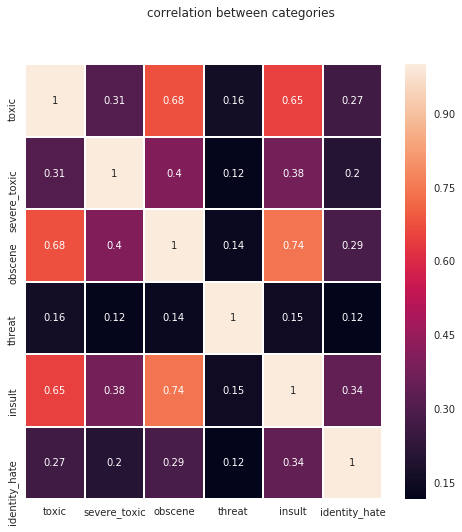

In [7]:
f, ax = plt.subplots(figsize=(8, 8))
f.suptitle('correlation between categories')
sns.heatmap(train_df[labels].corr(), annot=True, linewidths=.9, ax=ax)

### length of comment by class

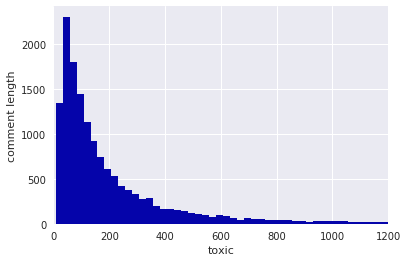

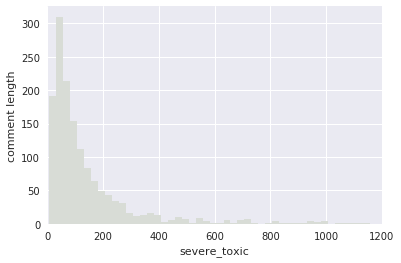

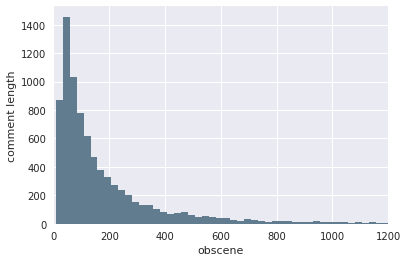

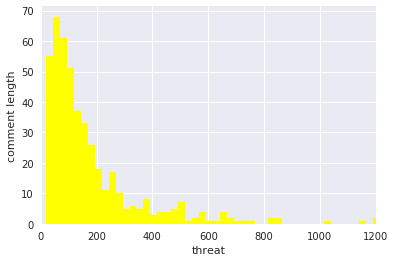

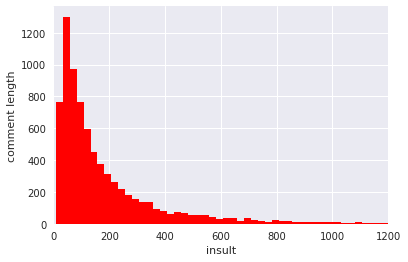

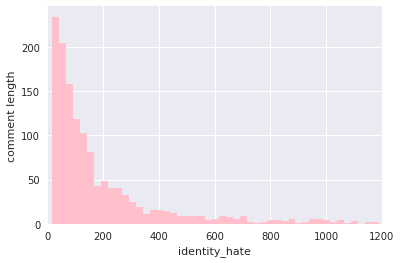

In [8]:
colors = ['#0504aa', '#d8dcd6', '#607c8e', 'yellow', 'red', 'pink']
i = 0
for label in labels:
    curr_df = train_df[train_df[label] == 1]
    text_length = curr_df['comment_text'].apply(lambda x: len(x))
    plt.hist(np.array(text_length), bins=200, color = colors[i])
    i += 1
    plt.ylabel('comment length')
    plt.xlabel(label)
    plt.xlim(right=1200)
    plt.xlim(left=0)
    plt.show()

#
#
### most frequent words by class, stop words -  removed
#
#

In [9]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

for label in labels:
    sub_train_df = train_df[train_df[label] == 1]["comment_text"]
    most_frequent = get_top_n_words(sub_train_df, 10)
    print(f' \n The most_frequent words in ## {label} ## comments are: \n')
    for word in most_frequent:
        print(f' word: "{word[0]}" count: {word[1]}')

 
 The most_frequent words in ## toxic ## comments are: 

 word: "fuck" count: 9934
 word: "wikipedia" count: 3678
 word: "shit" count: 3622
 word: "like" count: 3512
 word: "nigger" count: 3300
 word: "fucking" count: 3289
 word: "suck" count: 3235
 word: "ass" count: 2939
 word: "hate" count: 2631
 word: "don" count: 2569
 
 The most_frequent words in ## severe_toxic ## comments are: 

 word: "fuck" count: 7303
 word: "suck" count: 2535
 word: "ass" count: 2114
 word: "shit" count: 1884
 word: "faggot" count: 1571
 word: "fucking" count: 1456
 word: "die" count: 1156
 word: "bitch" count: 1113
 word: "nigger" count: 1012
 word: "sucks" count: 961
 
 The most_frequent words in ## obscene ## comments are: 

 word: "fuck" count: 9860
 word: "shit" count: 3212
 word: "fucking" count: 3192
 word: "suck" count: 3021
 word: "ass" count: 2846
 word: "nigger" count: 2727
 word: "wikipedia" count: 1905
 word: "bitch" count: 1795
 word: "like" count: 1541
 word: "cunt" count: 1530
 
 The most_f

In [10]:
for label in labels:
    counts = train_df[label].value_counts()
    print(f' {label} : num of 1 labels {counts[1]} out of {counts[0]} ')

 toxic : num of 1 labels 15294 out of 144277 
 severe_toxic : num of 1 labels 1595 out of 157976 
 obscene : num of 1 labels 8449 out of 151122 
 threat : num of 1 labels 478 out of 159093 
 insult : num of 1 labels 7877 out of 151694 
 identity_hate : num of 1 labels 1405 out of 158166 
